In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import torch
import torchtext
from torchtext import data
import spacy
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

df = pd.read_csv("./data/liar_dataset/result_toxic_analysis.csv")

/Users/rene/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


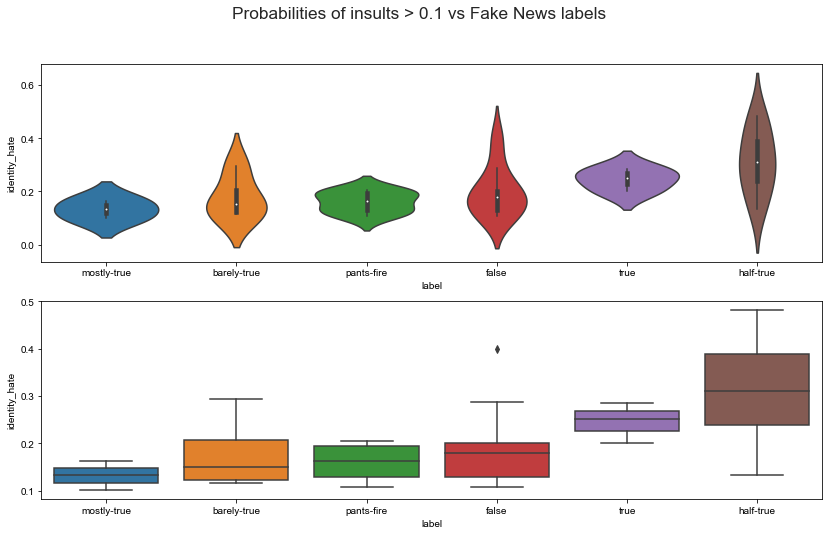

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(14, 8))
axx=ax.flat
th=0.1
cat= 'identity_hate'
_df = df[ (df[cat]>th)  ] 

sns.violinplot(y=cat,x= 'label' , data= _df, kind="box", ax=axx[0])
sns.catplot(y=cat,x= 'label' , data=_df, kind="box", ax=axx[1])
sns.set(font_scale=1.2)
fig.suptitle('Probabilities of insults > 0.1 vs Fake News labels')

plt.close(2);

In [32]:
_label= 'identity_hate'
_df= df[['statement',_label,'half_true_counts']].sort_values(by=_label, ascending=False).reset_index(drop=True).head()

In [38]:
_df.loc[4]

statement           An attack on a healthy n year old homosexual m...
identity_hate                                                0.310115
half_true_counts                                                    1
Name: 4, dtype: object

In [31]:
df

,ID,label,statement,subject,speaker,speaker_job,state_info,afiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0.004558,0.000606,0.003339,0.000467,0.002424,0.001983
1,10540.json,half-true,When did the decline of coal start It started ...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,0.003691,0.000328,0.002229,0.000198,0.001382,0.000388
2,324.json,mostly-true,Hillary Clinton agrees with John McCain by vot...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,0.001425,0.000163,0.000738,0.000167,0.000799,0.000596
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0.012531,0.000344,0.003012,0.000174,0.001819,0.001034
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,0.002796,0.000354,0.001750,0.000231,0.001534,0.000556
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,0.001813,0.000329,0.001420,0.000243,0.001179,0.000556
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,0.001657,0.000363,0.001411,0.000261,0.001195,0.000965
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",0.000267,0.000068,0.000184,0.000035,0.000201,0.000090
8,5602.json,half-true,However it took n n million in Oregon Lottery ...,jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,0.000124,0.000062,0.000253,0.000047,0.000208,0.000110
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,0.000461,0.000065,0.000251,0.000077,0.000400,0.000120
